### In this notebook, we will take our ugly spaghetti code and add abstraction through the use of functions and classes. 

In [2]:
import random
from matplotlib import pyplot as plt
%matplotlib inline

Our ECA spaghetti code

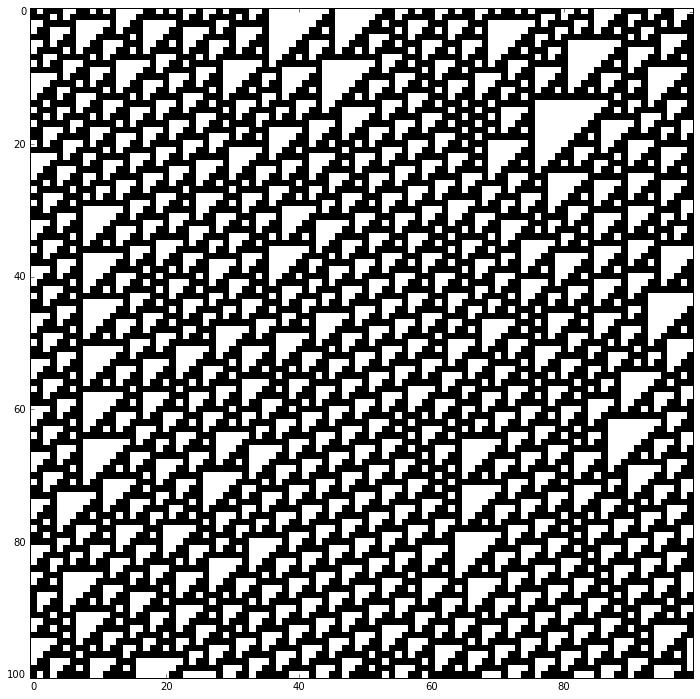

In [3]:
rule_number = 110
length = 100
time = 100 

# make the initial condition
initial_condition = []
for i in range(length):
    initial_condition.append(random.randint(0,1))

# create list of neighborhood tuples in lex. order
neighborhoods = [(0,0,0), (0,0,1), (0,1,0), (0,1,1), (1,0,0), (1,0,1), (1,1,0), (1,1,1)]

# convert the rule number to binary and padd with 0s as needed
in_binary = bin(rule_number)[2:][::-1]
binary_length = len(in_binary)
if binary_length != 8:
    padding = 8 - binary_length
    in_binary = in_binary + '0'*padding

# create the lookup table dictionary
lookup_table = {}
for i in range(8):
    key = neighborhoods[i]
    val = in_binary[i]
    lookup_table.update({key:val})
    
# initialize spacetime field and current configuration
spacetime_field = [initial_condition]
current_configuration = initial_condition[:]

# apply the lookup table to evolve the CA for the given number of time steps
for t in range(time):
    new_configuration = []
    for i in range(len(current_configuration)):
        
        neighborhood = (current_configuration[(i-1)], 
                        current_configuration[i], 
                        current_configuration[(i+1)%length])
        
        new_configuration.append(int(lookup_table[neighborhood]))
        
    current_configuration = new_configuration
    spacetime_field.append(new_configuration)
    
# plot the spacetime field diagram
plt.figure(figsize=(12,12))
plt.imshow(spacetime_field, cmap=plt.cm.Greys, interpolation='nearest')
plt.show()

In [3]:
def random_string(length):
    '''
    Returns a random binary string of the given length.
    '''
    return [random.randint(0,1) for _ in range(length)]

In [4]:
print random_string(20)

[1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0]


It does not make much sense to create the neighborhoods function below. It should just be a global variable. One reason you might do something like this though is if you're prototyping code and this acts as a placeholder for a future function. In this case, we eventually want a general 1D CA simulator, in which case a neighborhoods function would be nontrivial.

In [5]:
def neighborhoods():
    '''
    
    '''
    return [(0,0,0), (0,0,1), (0,1,0), (0,1,1), (1,0,0), (1,0,1), (1,1,0), (1,1,1)]

In [6]:
print neighborhoods()

[(0, 0, 0), (0, 0, 1), (0, 1, 0), (0, 1, 1), (1, 0, 0), (1, 0, 1), (1, 1, 0), (1, 1, 1)]


We will not actually use this function, and just define a local neighborhoods variable inside the lookup table function below

In [4]:
def lookup_table(rule_number):
    '''
    Returns a dictionary which maps ECA neighborhoods to output values. 
    Uses Wolfram rule number convention.
    '''
    neighborhoods = [(0,0,0), (0,0,1), (0,1,0), (0,1,1), (1,0,0), (1,0,1), (1,1,0), (1,1,1)]
    in_binary = '{:{fill}{align}{width}b}'.format(rule_number, 
                                                  fill='0', 
                                                  align='>', 
                                                  width='8')
    
    return dict(zip(neighborhoods, reversed(map(int,in_binary))))

A little demo of how map works

In [21]:
print map(int,'{:{fill}{align}{width}b}'.format(18, 
                                                  fill='0', 
                                                  align='>', 
                                                  width='8'))

print [int(i) for i in '{:{fill}{align}{width}b}'.format(18, 
                                                  fill='0', 
                                                  align='>', 
                                                  width='8')]

[0, 0, 0, 1, 0, 0, 1, 0]
[0, 0, 0, 1, 0, 0, 1, 0]


In [17]:
for key, val in lookup_table(18).items():
    print key, '-->', val

(0, 1, 1) --> 0
(1, 1, 0) --> 0
(1, 0, 0) --> 1
(0, 0, 1) --> 1
(1, 0, 1) --> 0
(0, 0, 0) --> 0
(0, 1, 0) --> 0
(1, 1, 1) --> 0


In [5]:
def spacetime_field(rule_number, initial_condition, time_steps):
    '''
    Return a spacetime field array using the given rule number on the 
    given initial condition for the given number of time steps.
    '''
    lookup = lookup_table(rule_number)
    
    length = len(initial_condition)
    
    # initialize spacetime field and current configuration
    spacetime_field = [initial_condition]
    current_configuration = initial_condition[:]

    # apply the lookup table to evolve the CA for the given number of time steps
    for t in range(time_steps):
        new_configuration = []
        for i in range(len(current_configuration)):

            neighborhood = (current_configuration[(i-1)], 
                            current_configuration[i], 
                            current_configuration[(i+1)%length])

            new_configuration.append(lookup[neighborhood])

        current_configuration = new_configuration
        spacetime_field.append(new_configuration)
    
    return spacetime_field

In [25]:
for config in spacetime_field(18, random_string(20), 20):
    print config

[0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1]
[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1]
[1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0]
[0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0]
[0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0]
[0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1]
[1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0]
[0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0]
[0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0]
[0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1]
[1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0]
[0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0]
[0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0]
[0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1]
[1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0]
[0, 0, 0, 0, 1, 0, 0, 1,

In [5]:
def spacetime_diagram(spacetime_field, size=12, colors=plt.cm.Greys):
    '''
    
    '''
    plt.figure(figsize=(size,size))
    plt.imshow(spacetime_field, cmap=colors, interpolation='nearest')
    plt.show()

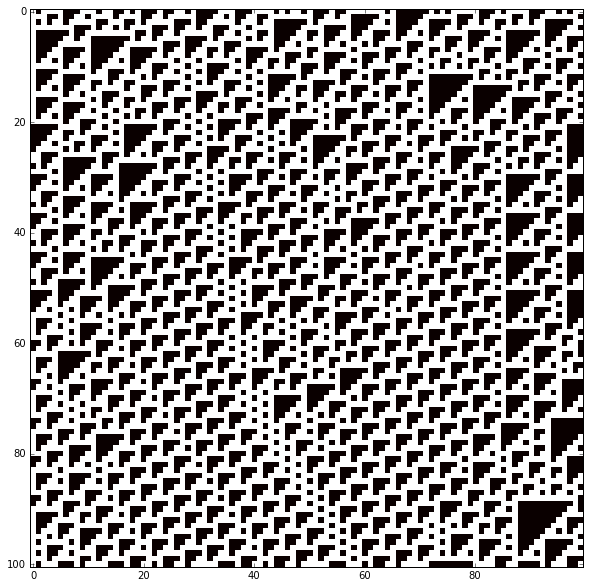

In [38]:
field = spacetime_field(110, random_string(100), 100)
spacetime_diagram(field, 10, colors=plt.cm.hot)

## Classes

Below is a "bad" example of using classes for an ECA simulator, based off an example in this video https://youtu.be/o9pEzgHorH0?t=1043

This uses the intuition of a cell (site), a lattice of cells, and a spacetime field of lattices as being objects, and thus represented as classes. 

In [7]:
class Site(object):
    
    def __init__(self, position, value):
        self.position = position
        self.value = value
        
    def neighbors(self, length):
        yield self.position-1
        yield self.position
        yield (self.position+1)%length

In [8]:
class Lattice(object):
    
    def __init__(self, length):
        self.length = length
        self.lattice = []
        for i in range(length):
            site_value = random.randint(0,1)
            self.lattice.append(Site(i, site_value))
            
    
    def __len__(self):
        return self.length
    
    def __getitem__(self, index):
        if index >= len(self):
            raise IndexError
        return self.lattice[index]
    
    def update(self, rule_number):
        self.lookup_table = lookup_table(rule_number)
        updated_lattice = self.lattice[:]
        for site in self:
            neighborhood = ()
            for neighbor_index in site.neighbors(self.length):
                neighborhood += (self.lattice[neighbor_index].value, )
            updated_lattice[site.position] = Site(site.position, 
                                                  int(self.lookup_table[neighborhood]))
        
        self.lattice = updated_lattice

Some notes:

The above is something I threw together pretty quickly and is just meant to demonstrate some things about classes. It is not good code; the ''update'' method of Lattice is not written very efficiently and the ''neighbors'' method of Site should not need the length parameter (a try-except statement when neighbors is called could be used to catch the inex error, as a way to get rid of that parameter).

In the lattice class, having the \__len\__ and \__getitem\__ methods makes lattices iterable, so that something like ''for site in self:'' can be used. 

I don't feel like writing it up, but the natural extension of this would be to then add a SpacetimeField class. It could be made iterable where it iterates through its Lattice objects, the way Lattice objects iterate through Site objects. If you do this it would make sense to have the ''update'' method with the SpacetimeField class and not the Lattice class. But then why have a Lattice class at all? Very quickly you see making these three classes is not the right way to go. In fact, using an array or list of lists for spacetime fields, as we have done up to this point, allows for iteration in exactly the same way that we designed the above classes to be. 

That is, if we have a spacetime field array / list of lists, we can iterate through all points in the field with the following for loops:
       

In [15]:
field = spacetime_field(18, random_string(5), time_steps=3)

print field, '\n'

for lattice in field:
    print lattice
print '\n'

for lattice in field:
    for site in lattice:
        print site

[[0, 0, 0, 0, 1], [1, 0, 0, 1, 0], [0, 1, 1, 0, 0], [1, 0, 0, 1, 0]] 

[0, 0, 0, 0, 1]
[1, 0, 0, 1, 0]
[0, 1, 1, 0, 0]
[1, 0, 0, 1, 0]


0
0
0
0
1
1
0
0
1
0
0
1
1
0
0
1
0
0
1
0


So what is a better way to do this? Rather than thinking with more physical intuition (from the video, ''cell is a noun, so let's make that an object'', and similarly for lattice and spacetime field), let's think of ECAs as mathematical objects. In the first code we wrote, we discussed first what defines a CA. These will be the attributes which instantiate a CA object. 

So a CA object is an abstraction which has various attributes and methods associated with it. It has a local dynamic for how to evolve sites based on neighborhoods, which is given as a lookup table and specified through the rule number. As a dynamical system it has an initial condition from which it starts. A spacetime field is then filled out by applying the lookup table to the initial and subsequent configurations. A particular CA object instance will have a specific lookup table as specified by the particular rule number given on instantiation, as well as a particular initial condition. The spacetime field will be created with the ''evolve'' method with the specified number of time steps. 

A better way to use classes for our ECA simulator

In [31]:
class ECA(object):
    
    def __init__(self, rule_number, initial_condition):
        self.lookup_table = lookup_table(rule_number)
        self.initial = initial_condition
        self.spacetime = [initial_condition]
        self.current_configuration = initial_condition[:]
        self.length = len(initial_condition)

    def evolve(self, time):
        for t in range(time):
            new_configuration = []
            for i in range(self.length):

                neighborhood = (self.current_configuration[(i-1)], 
                                self.current_configuration[i], 
                                self.current_configuration[(i+1)%self.length])

                new_configuration.append(self.lookup_table[neighborhood])

            self.current_configuration = new_configuration
            self.spacetime.append(new_configuration)

In [32]:
ca = ECA(18, random_string(20))

In [33]:
print ca.current_configuration

[1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0]


In [34]:
ca.evolve(1)

In [35]:
print ca.initial
print ca.current_configuration

[1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0]
[0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]


In [36]:
ca = ECA(110, random_string(100))
ca.evolve(100)

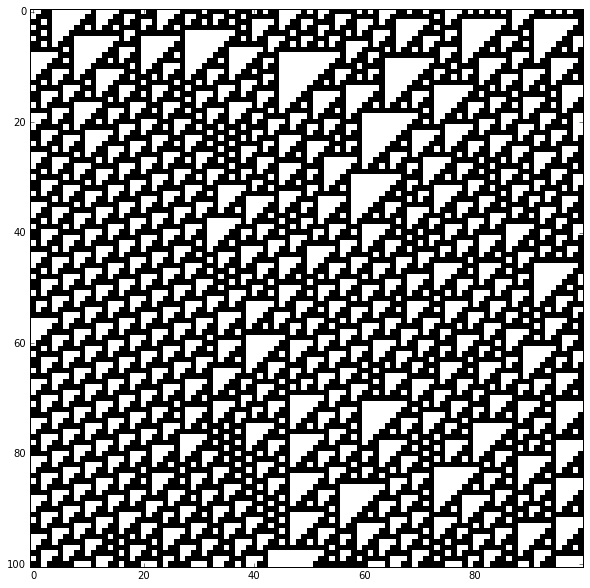

In [38]:
spacetime_diagram(ca.spacetime, size=10, colors=plt.cm.Greys)